<ipython-input-2-7dde4db1ef4e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCost"] = df["Quantity"] * df["UnitPrice"]


                        Quantity     UnitPrice     TotalCost
count               3.979240e+05  3.979240e+05  3.979240e+05
mean                1.302182e+01  3.116174e+00  2.239475e+01
std                 1.804202e+02  2.209679e+01  3.090556e+02
min                 1.000000e+00  0.000000e+00  0.000000e+00
25%                 2.000000e+00  1.250000e+00  4.680000e+00
50%                 6.000000e+00  1.950000e+00  1.180000e+01
75%                 1.200000e+01  3.750000e+00  1.980000e+01
max                 8.099500e+04  8.142750e+03  1.684696e+05
Total Sales         8.911408e+06  8.911408e+06  8.911408e+06
Sales per Customer  2.053793e+03  2.053793e+03  2.053793e+03


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


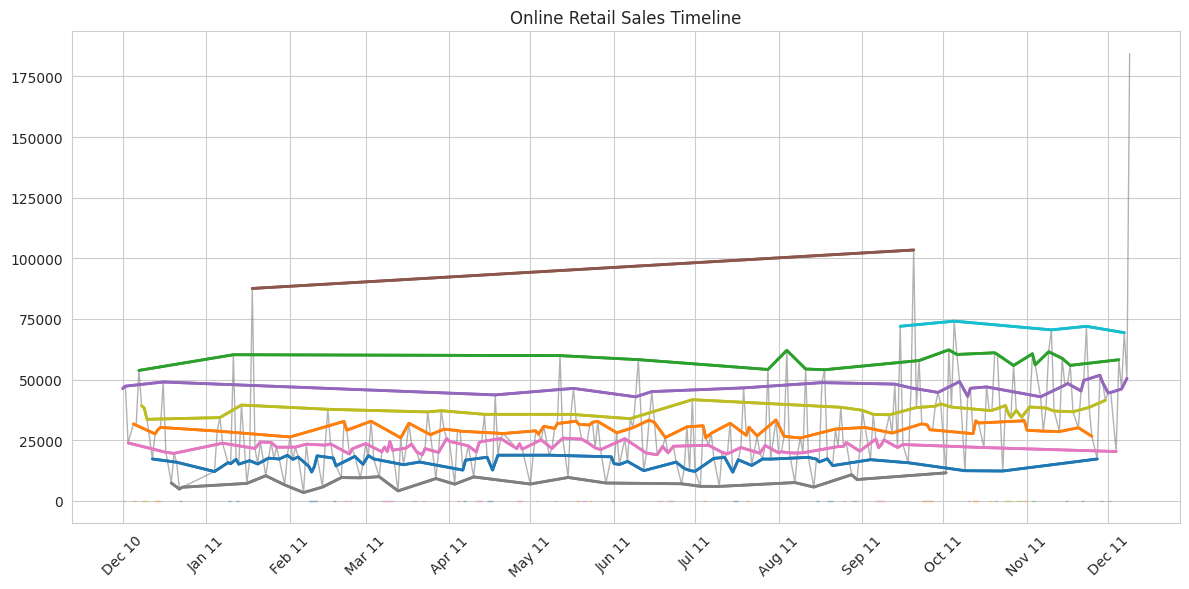

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.cluster import KMeans

# Load the Online Retail dataset into a pandas dataframe
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(url)


# Preprocess the data
df.dropna(inplace=True)
df = df[df["Quantity"] > 0]
df["TotalCost"] = df["Quantity"] * df["UnitPrice"]

# Define a function for summarizing key data features based on user preferences
def summarize_data(df, preferences):
    # Calculate summary statistics
    summary_df = df.describe()
    
    # Filter columns based on user preferences
    columns_to_include = []
    for column in preferences["columns"]:
        if column in summary_df.columns:
            columns_to_include.append(column)
    summary_df = summary_df[columns_to_include]
    
    # Add additional metrics based on user preferences
    for metric in preferences["metrics"]:
        if metric == "total_sales":
            total_sales = df["TotalCost"].sum()
            summary_df.loc["Total Sales"] = total_sales
        elif metric == "sales_per_customer":
            sales_per_customer = df.groupby("CustomerID")["TotalCost"].sum().mean()
            summary_df.loc["Sales per Customer"] = sales_per_customer
    
    # Return summarized data
    return summary_df

# Define user preferences
preferences = {
    "columns": ["Quantity", "UnitPrice", "TotalCost"],
    "metrics": ["total_sales", "sales_per_customer"]
}

# Print summarized data
print(summarize_data(df, preferences))

# Time segmentation
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]).dt.date
grouped_data = df.groupby("InvoiceDate").agg({"TotalCost": "sum"})
grouped_data.reset_index(inplace=True)

# Segment encoding
x = pd.to_datetime(grouped_data["InvoiceDate"])
y = grouped_data["TotalCost"]

# Bundle generation
kmeans = KMeans(n_clusters=10).fit(y.values.reshape(-1, 1))
cluster_labels = kmeans.labels_
grouped_data["cluster"] = cluster_labels
grouped_data.sort_values(by="cluster", inplace=True)

# Layout generation
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y, color='gray', alpha=0.6, linewidth=1)

# Define layout parameters
n_lines = len(set(cluster_labels))
line_height = 0.8
line_padding = 0.05
line_y0 = 0.2
line_y1 = line_y0 + line_height

for i in range(n_lines):
    color = plt.cm.tab10(i / n_lines)
    ax.fill_between(x, line_y0 + i*line_height + i*line_padding, 
                    line_y1 + i*line_height + i*line_padding, 
                    where=cluster_labels == i, alpha=0.2, color=color)
    ax.plot(x[cluster_labels == i], y[cluster_labels == i], color=color, linewidth=2)
    
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.xticks(rotation=45)
plt.title("Online Retail Sales Timeline")
plt.tight_layout()

# Update the plot
def update_plot(selected_indices):
    # Filter data based on selected indices
    filtered_data = grouped_data.iloc[selected_indices]
    
    # Get new cluster labels
    kmeans = KMeans(n_clusters=n_lines).fit(filtered_data["TotalCost"].values.reshape(-1, 1))
    cluster_labels = kmeans.predict(grouped_data["TotalCost"].values.reshape(-1, 1))
    # Sort data by cluster labels
    grouped_data["cluster"] = cluster_labels
    grouped_data.sort_values(by="cluster", inplace=True)
    # Update plot
    ax.clear()
    ax.plot(x, y, color='gray', alpha=0.6, linewidth=1)

for i in range(n_lines):
    color = plt.cm.tab10(i / n_lines)
    ax.fill_between(x, line_y0 + i*line_height + i*line_padding, 
                    line_y1 + i*line_height + i*line_padding, 
                    where=cluster_labels == i, alpha=0.2, color=color)
    ax.plot(x[cluster_labels == i], y[cluster_labels == i], color=color, linewidth=2)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.xticks(rotation=45)
plt.title("Online Retail Sales Timeline")
plt.tight_layout()
plt.show()



Summarizing the top 20 products 

<ipython-input-12-940b14e7ce20>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCost"] = df["Quantity"] * df["UnitPrice"]


     StockCode  Quantity         InvoiceDate   UnitPrice  \
0        10002       823 2011-04-18 12:56:00    0.850000   
1        10080       291 2011-11-21 17:04:00    0.411905   
2        10120       193 2011-12-04 13:15:00    0.210000   
3        10125      1226 2011-12-09 10:13:00    0.782813   
4        10133      2384 2011-09-07 10:07:00    0.527500   
...        ...       ...                 ...         ...   
3660        C2       134 2011-12-05 10:18:00   50.135338   
3661       DOT        16 2011-12-05 17:17:00  744.147500   
3662         M      7179 2011-12-08 13:50:00  171.664862   
3663      PADS         4 2011-09-25 14:58:00    0.000750   
3664      POST      3120 2011-12-09 12:16:00   31.570482   

                       Description     TotalCost  PreferenceScore  
0      INFLATABLE POLITICAL GLOBE   6.995500e+02                0  
1         GROOVY CACTUS INFLATABLE  1.198643e+02                0  
2                     DOGGY RUBBER  4.053000e+01                0  
3      

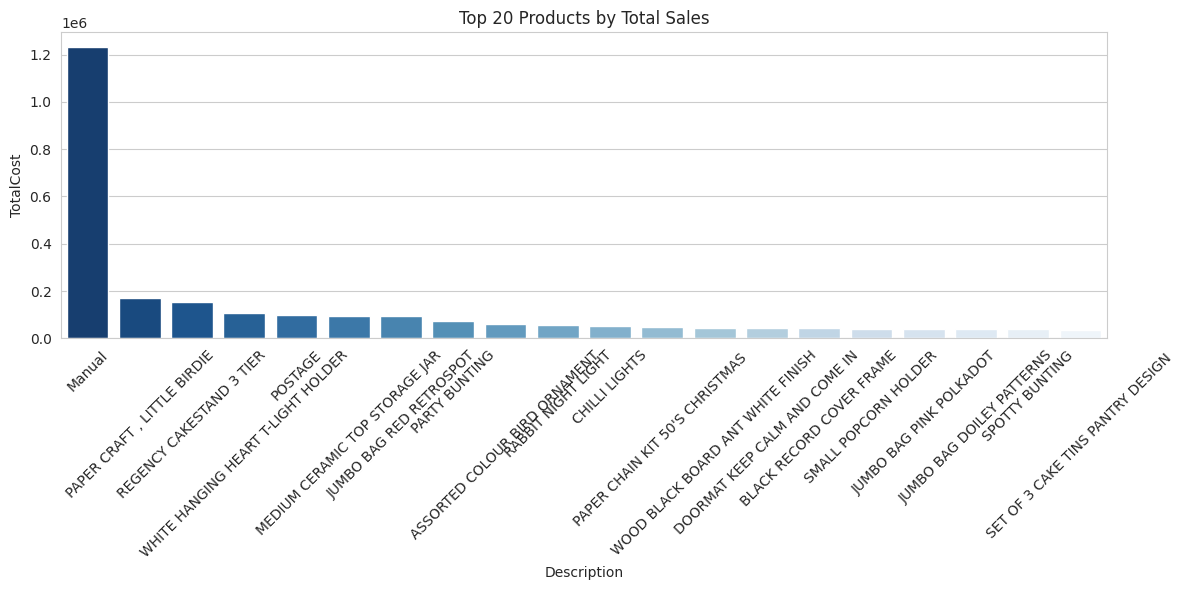

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector
import seaborn as sns

# Load the Online Retail dataset into a pandas dataframe
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(url)

# Preprocess the data
df.dropna(inplace=True)
df = df[df["Quantity"] > 0]
df["TotalCost"] = df["Quantity"] * df["UnitPrice"]

# Define a function for summarizing product trends based on user preferences
def summarize_product_trends(df, preferences):
    product_data = df.groupby("StockCode").agg({"Quantity": "sum", "InvoiceDate": "max", "UnitPrice": "mean", "Description": "first"})
    product_data["TotalCost"] = product_data["Quantity"] * product_data["UnitPrice"]
    product_data = product_data.reset_index()
    product_data["PreferenceScore"] = product_data["StockCode"].apply(lambda x: preferences.get(x, 0))
    return product_data


# Define user preferences
preferences = {
    "group_by": "Description",
    "aggregations": {
        "TotalCost": ["sum"],
        "Quantity": ["sum"],
        "InvoiceNo": ["nunique"]
    }
}

# Print summarized data
print(summarize_product_trends(df, preferences))

# Visualize product trends
sns.set_style("whitegrid")
top_n = 20
product_data = summarize_product_trends(df, preferences).sort_values("TotalCost", ascending=False)[:top_n]

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="Description", y="TotalCost", data=product_data, palette="Blues_r")
plt.xticks(rotation=45)
plt.title(f"Top {top_n} Products by Total Sales")
plt.tight_layout()
plt.show()


The visualizations after adding interactions

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.cluster import KMeans

# Load the Online Retail dataset into a pandas dataframe
url = '/content/Online Retail.xlsx'
df = pd.read_excel(url)

# Preprocess the data
df.dropna(inplace=True)
df = df[df["Quantity"] > 0]
df["TotalCost"] = df["Quantity"] * df["UnitPrice"]

# Time segmentation
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]).dt.date
grouped_data = df.groupby("InvoiceDate").agg({"TotalCost": "sum"})
grouped_data.reset_index(inplace=True)

# Segment encoding
x = grouped_data["InvoiceDate"]
y = grouped_data["TotalCost"]

# Bundle generation for sales timeline
kmeans = KMeans(n_clusters=10).fit(y.values.reshape(-1, 1))
cluster_labels = kmeans.labels_
grouped_data["cluster"] = cluster_labels
grouped_data.sort_values(by="cluster", inplace=True)

# Create a bar plot for sales timeline using Plotly
fig_sales_timeline = go.Figure()

for i, cluster in enumerate(sorted(grouped_data["cluster"].unique())):
    cluster_data = grouped_data[grouped_data["cluster"] == cluster]
    fig_sales_timeline.add_trace(go.Bar(
        x=cluster_data["InvoiceDate"],
        y=cluster_data["TotalCost"],
        name=f"Cluster {cluster}",
        marker_color=f"rgba({int(255 * i / len(cluster_labels))}, 0, 0, 0.6)"
    ))

# Update the layout for sales timeline
fig_sales_timeline.update_layout(
    title="Online Retail Sales Timeline",
    xaxis=dict(
        title="Date"
    ),
    yaxis=dict(
        title="Total Cost"
    ),
    barmode="stack"
)

# Define a function to update the sales timeline plot based on selected clusters
def update_sales_timeline(selected_clusters):
    fig_sales_timeline.update_traces(visible="legendonly")
    for cluster in selected_clusters:
        fig_sales_timeline.update_traces(visible=True, selector=f"legendonly={cluster}")

# Display the sales timeline plot
fig_sales_timeline.show()

# Define a function for summarizing product trends based on user preferences
def summarize_product_trends(df, preferences):
    # Placeholder implementation, replace with your code to summarize product trends
    # and return a DataFrame with the summarized data
    product_data = df.groupby("StockCode").agg({"Quantity": "sum", "InvoiceDate": "max", "UnitPrice": "mean", "Description": "first"})
    product_data["TotalCost"] = product_data["Quantity"] * product_data["UnitPrice"]
    product_data = product_data.reset_index()
    product_data["PreferenceScore"] = product_data["StockCode"].apply(lambda x: preferences.get(x, 0))
    return product_data

# Define user preferences for product trends
preferences = {
    "group_by": "Description",
    "aggregations": {
        "TotalCost": ["sum"],
        "Quantity": ["sum"],
        "InvoiceNo": ["nunique"]
    }
}

# Summarize product trends
product_data = summarize_product_trends(df, preferences).sort_values("TotalCost", ascending=False)[:20]

# Create a bar plot for product trends using Plotly
fig_product_trends = go.Figure()

fig_product_trends.add_trace(
    go.Bar(
        x=product_data["Description"],
        y=product_data["TotalCost"],
        name="Total Cost",
        marker_color="rgba(0, 0, 255, 0.6)"
))

#Update the layout for product trends
fig_product_trends.update_layout(
title="Top 20 Products by Total Sales",
xaxis=dict(
title="Product Description"
),
yaxis=dict(
title="Total Sales"
)
)

#Display the product trends plot
fig_product_trends.show()


<ipython-input-1-235eee0c9f5e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCost"] = df["Quantity"] * df["UnitPrice"]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
